In [1]:
%matplotlib inline
#Import dependecies
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

import os
import requests
import json

In [2]:
# import api_keys
from api_keys import weather_api_key,g_key

In [3]:
#import the data in a df
path = "Resources/worldcities.csv"
cities_data = pd.read_csv(path)
cities_data.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [4]:
#Random choice of cities
bins = np.arange(-60,90,10)
labels = ["<-50","-50:-41","-40:-31","-30:-21","-20:-11","-10:-0",
            "1:10","11:20","21:30","31:40","41:50","51:60","61:70","70>"]
cities_data["Cuts"] = pd.cut(cities_data["Latitude"],bins = bins, labels = labels, include_lowest = True)

#choose randomly in the quartiles selected
cities_random = []
random.seed(15)
for cut in labels:
    grouped = cities_data[cities_data["Cuts"] == cut]
    if len(list(grouped["City"]))<=45:
        for city in list(grouped["City"]):
            cities_random.append(city)
    else :
        samples = random.sample(list(grouped["City"]),50)
        for city in samples:
           cities_random.append(city)

print(f"There are {len(cities_random)} random chosen cities")

There are 633 random chosen cities


In [5]:
#use the API to find the information needed
import concurrent.futures
import time
#create the base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
#create empty lists
cities_dic = {}

print("Beginning Data Retrieval")
print("-"*15)
# define a function to retrieve the data
def download_data(city):
    time.sleep(1)
    response = requests.get(base_url + str(city)).json()
    try: 
        cities_dic[city] = response["id"],response["sys"]["country"],\
            response["name"],response["dt"],response["coord"]["lat"],\
            response["coord"]["lon"],response["clouds"]["all"],\
            response["main"]["humidity"],response["wind"]["speed"],\
            response["main"]["temp_max"]
        print(f"Processing Record of {city} \n") 
    except:
        print(f"{city} not found, Skipping .. \n")

# make the download faster
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_data,cities_random)

print("-"*15)
print("Data Retrieve Complete")
print("-"*15) 

 arenas 






Processing Record of trelew 





Processing Record of porirua 
Processing Record of greymouth 
Processing Record of rakaia 
Processing Record of nelson 
Processing Record of christchurch 



Processing Record of leeston 
Processing Record of viedma 
Processing Record of riverton 
Processing Record of sefton 



Processing Record of seddon 

reefton not found, Skipping .. 

Processing Record of te horo 
Processing Record of dobson 
Processing Record of clyde 
Processing Record of hokitika 
Processing Record of edendale 
Processing Record of ranfurly 
Processing Record of milton 










Processing Record of wyndham 

Processing Record of himatangi 

Processing Record of wellington 

Processing Record of westport 

Processing Record of hobart 
Processing Record of rolleston 


Processing Record of ceres 

Processing Record of ancud 

Processing Record of palmerston north 

Processing Record of forbes 
Processing Record of artigas 


Processing Record of saldanha 
Proces

In [13]:
# Create the df from the dict
cities_df = pd.DataFrame(cities_dic).T.rename(
    {0 : "City_ID", 1 : "Country", 2:"City",3: "Date",\
    4:"Lat",5:"Long",6: "Cloudiness",7:"Humidity",\
    8:"Wind_Speed",9:"Temp_Max" },axis=1).\
    reset_index(drop = True)
# Drop duplicates if duplicated rows
print(f'{(cities_df[cities_df.duplicated()==True]).count().count()} duplicates')cities_df.drop_duplicates(inplace=True)

10 duplicates


In [14]:
#create the output files and export the df
output_csv = 'Resources/cities_data.csv'
output_html = 'Resources/cities_data.html'
outputs = [output_csv,output_html]
for file in outputs:
    f = open(file,'w')
    f.close()

In [15]:
# export df to to csv and html
cities_df.to_csv(output_csv,encoding = "UTF-8",index = False, header=True)
cities_df.to_html(output_html,columns = cities_df.columns,index = False, header=True)

In [16]:
# Remove the cities with >100% humidity
print(f'There are {cities_df[cities_df["Humidity"]>100]["City"].count()} city with a humidity over 100%')

There are 0 city with a humidity over 100%


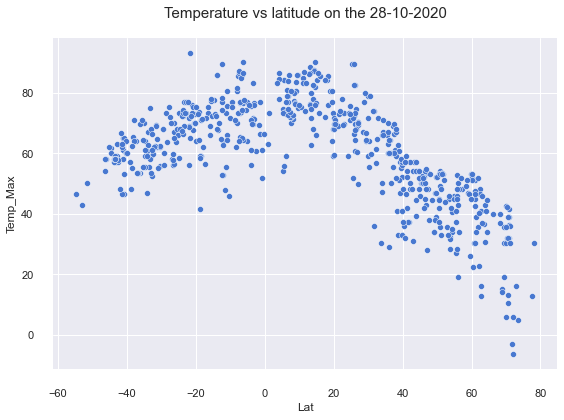

In [48]:
#plot latitude vs temperature
from datetime import datetime as dt
date = dt.strftime(dt.fromtimestamp(cities_df['Date'][0]),"%d-%m-%Y")
#plotting
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid",palette="muted")
sns.scatterplot(x=cities_df['Lat'], y=cities_df['Temp_Max'])
sns.despine(offset=10, trim=True)
plt.title(f'Temperature vs latitude on the {date}', fontsize=15, pad=20)
plt.tight_layout()
#save the graph
path = "data/temperature.png"
f = open(path,'w')
plt.savefig(path)
f.close()

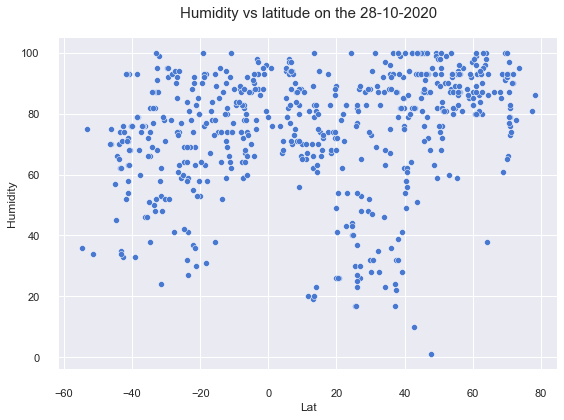

In [49]:
#plot lat vs humidity
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid",palette="muted")
sns.scatterplot(x=cities_df['Lat'], y=cities_df['Humidity'])
sns.despine(offset=10, trim=True)
plt.title(f'Humidity vs latitude on the {date}', fontsize=15, pad=20)
plt.tight_layout()
#save the graph
path = "data/humidity.png"
f = open(path,'w')
plt.savefig(path)
f.close()

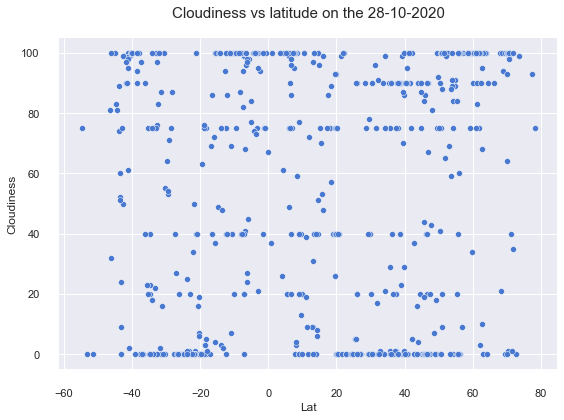

In [50]:
#plot lat vs cloudiness
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid",palette="muted")
sns.scatterplot(x=cities_df['Lat'], y=cities_df['Cloudiness'])
sns.despine(offset=10, trim=True)
plt.title(f'Cloudiness vs latitude on the {date}', fontsize=15, pad=20)
plt.tight_layout()
#save the graph
path = "data/cloudiness.png"
f = open(path,'w')
plt.savefig(path)
f.close()

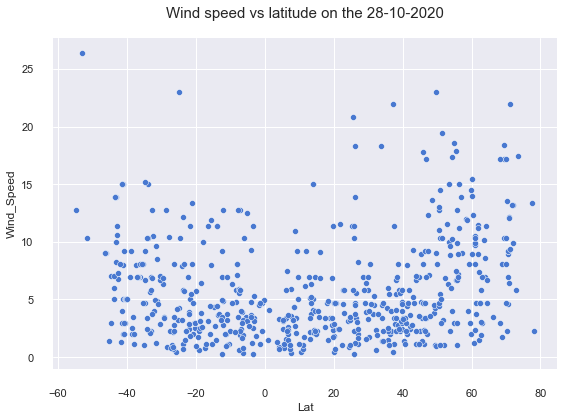

In [51]:
#plot lat vs Wind speed
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid",palette="muted")
sns.scatterplot(x=cities_df['Lat'], y=cities_df['Wind_Speed'])
sns.despine(offset=10, trim=True)
plt.title(f'Wind speed vs latitude on the {date}', fontsize=15, pad=20)
plt.tight_layout()
#save the graph
path = "data/wind_speed.png"
f = open(path,'w')
plt.savefig(path)
f.close()